# Multinomial Naive Bayes

In [16]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [27]:
data = pd.read_csv('train_1000_labeled.csv')
data = data.replace(np.nan, False)
for col in ['weddings', 'friendship', 'family', 'break ups', 'relationships', 'death', 'divorce', 'university']:
    data[col] = data[col].astype(int)
train = data[0:799]
test = data[800:999]

BREAK UPS accuracy is 1.0


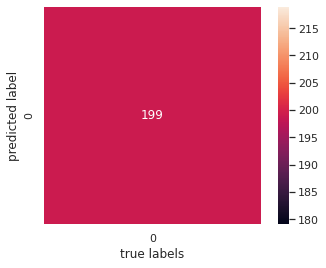

DEATH accuracy is 0.9798994974874372


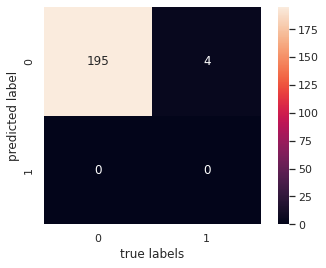

DIVORCE accuracy is 0.9949748743718593


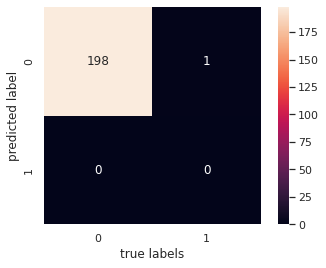

FAMILY accuracy is 0.8341708542713567


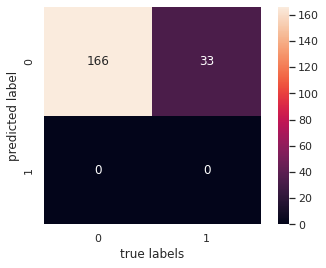

FRIENDSHIP accuracy is 0.8190954773869347


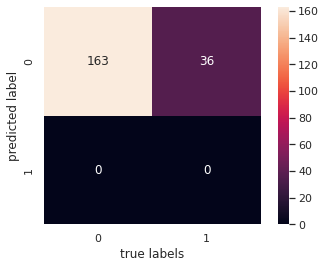

RELATIONSHIPS accuracy is 0.6231155778894473


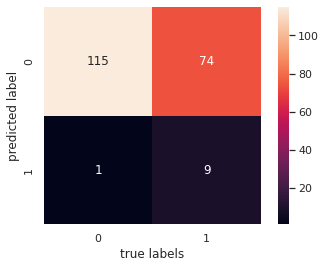

UNIVERSITY accuracy is 0.9849246231155779


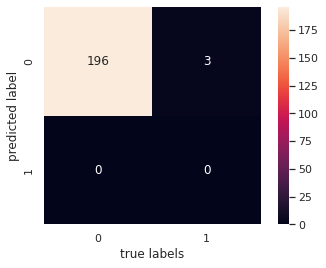

WEDDINGS accuracy is 0.9899497487437185


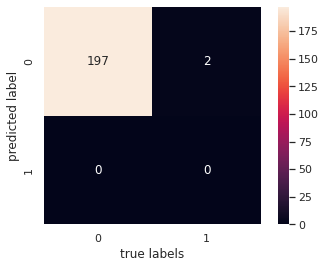

In [36]:
life_events = sorted(['weddings', 'friendship', 'family', 'break ups', 'relationships', 'death', 'divorce', 'university'])
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
for i in life_events:
    model.fit(train['description'], train[i])
    # Predict the categories of the test data
    predicted_categories = model.predict(test['description'])
    mat = confusion_matrix(test[i], predicted_categories)
    sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
    plt.xlabel("true labels")
    plt.ylabel("predicted label")
    print(i.upper(), "accuracy is {}".format(accuracy_score(test[i], predicted_categories)))
    plt.show()
    